<a href="https://colab.research.google.com/github/apledepla/SA2_AFUNDAR_CUERDO_RODILLAS/blob/task3/TASK_4%265_AFUNDAR_CUERDO_RODILLAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(caret)
library(dplyr)
library(rsample)
library(sm)
library(glmnet)
library(brms)

## KS test using Permutation Approach

In [ ]:
diabetes_df<-read.csv("diabetes.csv")

head(diabetes_df)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


For experimenting and learning purposes, the researchers used only 100 of the dataset with stratified sampling to retain the shape of the dataset itself. With this, we can effectively use empirical p-values to determine whether we can reject or accept the null hypothesis.

In [ ]:
set.seed(123)
split <- initial_split(diabetes_df, prop = 100 / nrow(diabetes_df), strata = Outcome)
df_sampled <- training(split)
df_test<-testing(split)

head(df_sampled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,103,30,38,83,43.3,0.183,33,0
2,3,88,58,11,54,24.8,0.267,22,0
3,1,146,56,0,0,29.7,0.564,29,0
4,1,103,80,11,82,19.4,0.491,22,0
5,0,146,82,0,0,40.5,1.781,44,0
6,1,79,75,30,0,32.0,0.396,22,0


Firstly, do a density plot to see the shapes of each important columns separated by the density of the outcome itself.


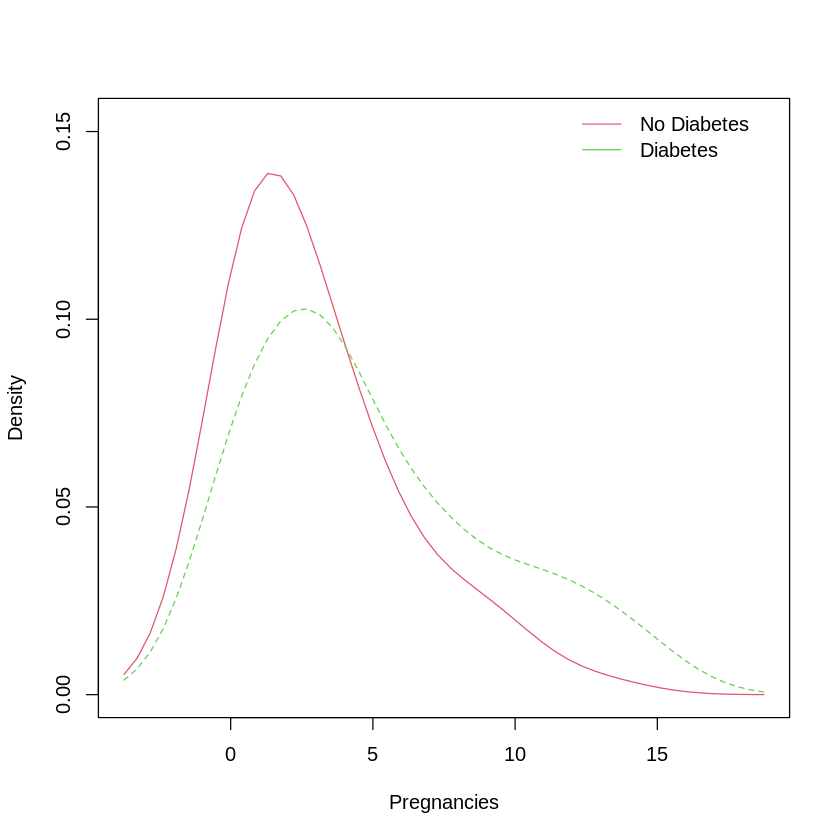

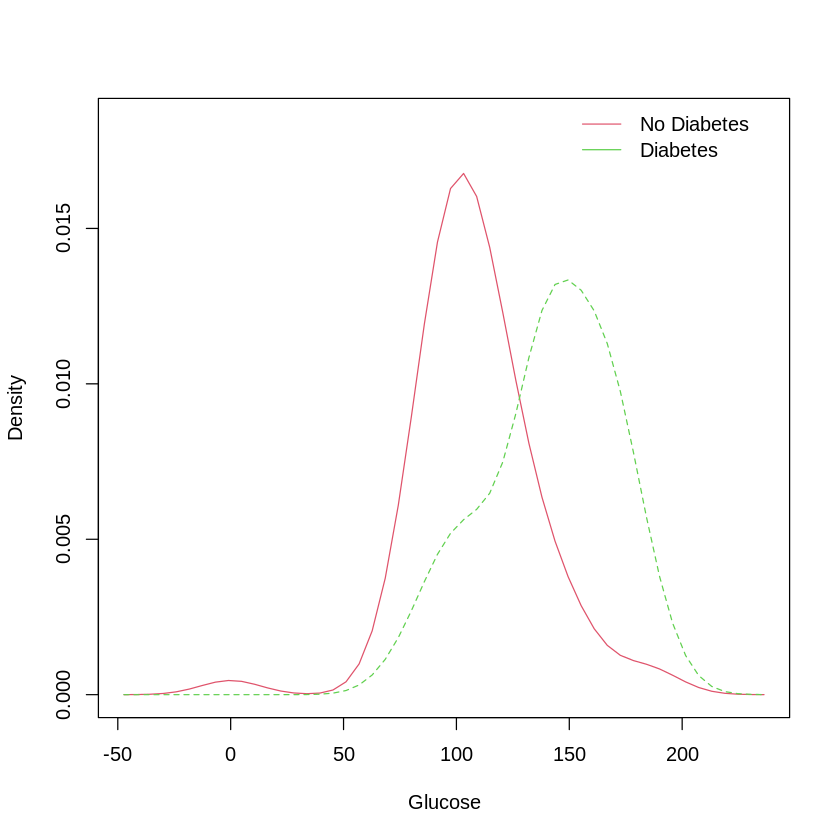

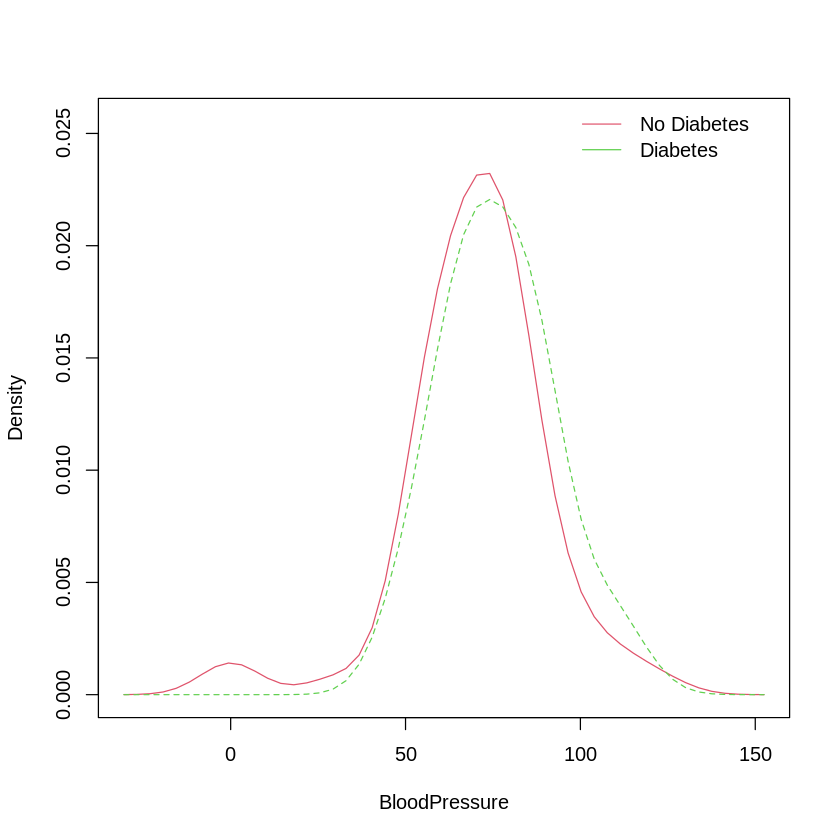

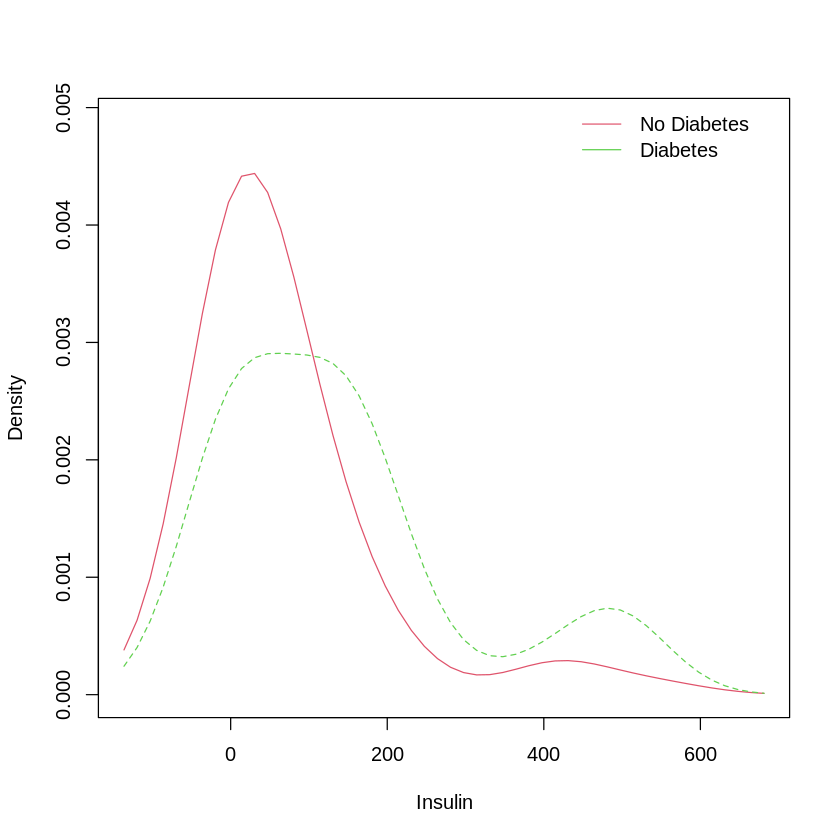

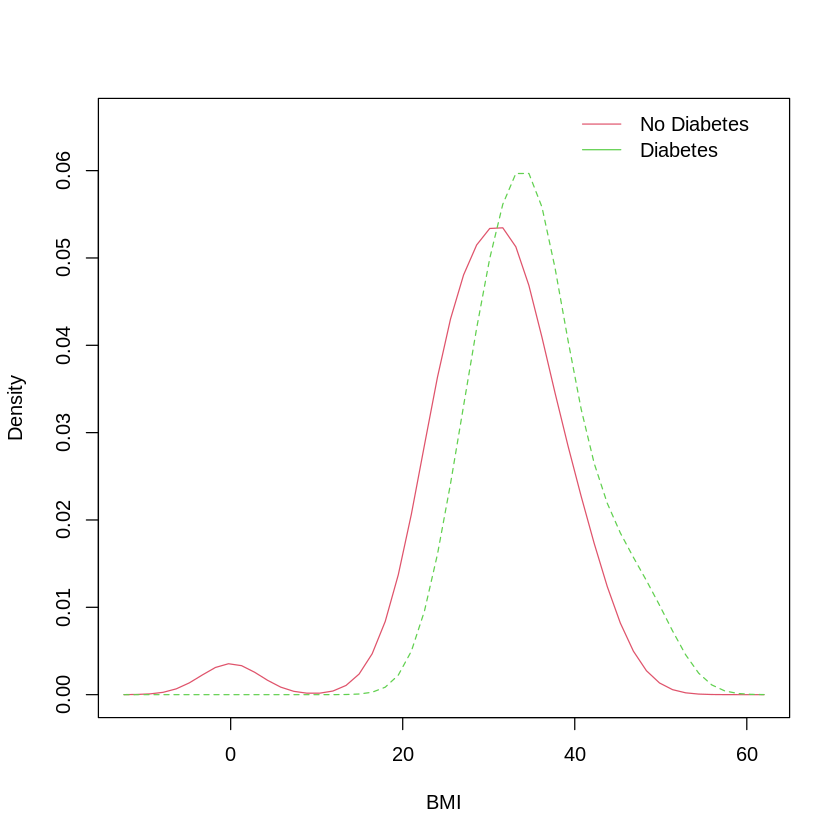

In [ ]:
cols<-c("Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI")

for (col in cols) {
  x <- df_sampled[[col]]
  group <- factor(df_sampled$Outcome, labels = c("No Diabetes", "Diabetes"))

  sm.density.compare(x, group, xlab = col, main = paste("Density Plot:", col))
  legend("topright", levels(group), col = 2:(1 + length(levels(group))), lty = 1, bty = "n")
}

As seen in the figures,


As initial prediction, we use the actual values from the logistic regression model to gauge how accurate the empirical values from the permutation approach will be.

In [ ]:
diabetes_model <- glm(Outcome ~ ., data = df_sampled, family = "binomial")


summary(diabetes_model)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = df_sampled)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.4258395  2.1330925  -4.419 9.92e-06 ***
Pregnancies               0.1916583  0.0994837   1.927 0.054038 .  
Glucose                   0.0423498  0.0112734   3.757 0.000172 ***
BloodPressure            -0.0169985  0.0170200  -0.999 0.317921    
SkinThickness             0.0206437  0.0213262   0.968 0.333045    
Insulin                  -0.0003619  0.0023064  -0.157 0.875315    
BMI                       0.1004562  0.0496984   2.021 0.043247 *  
DiabetesPedigreeFunction  0.5568835  0.8587192   0.649 0.516659    
Age                      -0.0007484  0.0289369  -0.026 0.979367    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.371  on 98  degrees of freedom
Residual deviance:  85.479  on 90  degrees of freed

As seen in the summary, Glucose had the highest significance in the odds of having diabetes, with a p-value of 0.0423498. The estimated coefficient of 0.043247 suggests that as a unit of glucose increase, the odds of having diabetes also increase, translating to higher probability of being diabetic.

BMI also resulted a moderate significance with a p-value of 0.043247. This indicates that as BMI increases by 1 unit, the odds also increases by a estimated coefficient of 0.1004562.

Pregnancies is borderline insignificant with a p-value of 0.054038, meaning there is some evidence of an effect, but not strong enough to meet the threshold. The rests of the features are insignificant and has no significant effect on the odds of having diabetes.



Since multiple logistic regression take account of all columns on the p-values, we can check whether the p-value of each important feature will have a major change in their significance on the odds of having diabetes.

Firstly, Glucose

In [ ]:
diabetes_model_gluc <- glm(Outcome ~ Glucose, data = df_sampled, family = "binomial")


summary(diabetes_model_gluc)


Call:
glm(formula = Outcome ~ Glucose, family = "binomial", data = df_sampled)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.125525   1.265280  -4.841 1.29e-06 ***
Glucose      0.043983   0.009771   4.501 6.75e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.371  on 98  degrees of freedom
Residual deviance:  99.121  on 97  degrees of freedom
AIC: 103.12

Number of Fisher Scoring iterations: 4


The summary resulted to Glucose being highly significant to the odds of having diabetes with a p-value fo 6.75e-06. This justifies the previous model that also resulted to Glucose being highly significant. This indicates that despite the sharing of traits and coefficients in multiple logistic regression, Glucose remains highly significant in the odds of having diabetes.

In [ ]:
diabetes_model_preg <- glm(Outcome ~ Pregnancies, data = df_sampled, family = "binomial")


summary(diabetes_model_preg)


Call:
glm(formula = Outcome ~ Pregnancies, family = "binomial", data = df_sampled)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2310     0.3287  -3.745  0.00018 ***
Pregnancies   0.1509     0.0616   2.449  0.01431 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.37  on 98  degrees of freedom
Residual deviance: 121.00  on 97  degrees of freedom
AIC: 125

Number of Fisher Scoring iterations: 4


The summary shows that the pregnancies feature is mildly significant with a p-value of 0.01431. This is different with the result given from the multiple logistic regression. This is due to the fact that other features explained some of the variance from Pregnancies that resulted into multicollinearity. This indicates that the effect of the pregnancy is not entirely independent but rather a proxy for other features.

In [ ]:
diabetes_model_bp <- glm(Outcome ~ BloodPressure, data = df_sampled, family = "binomial")


summary(diabetes_model_bp)


Call:
glm(formula = Outcome ~ BloodPressure, family = "binomial", data = df_sampled)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -2.06211    0.95957  -2.149   0.0316 *
BloodPressure  0.01924    0.01255   1.532   0.1255  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.37  on 98  degrees of freedom
Residual deviance: 124.82  on 97  degrees of freedom
AIC: 128.82

Number of Fisher Scoring iterations: 4


As seen in the summary, Bloodpressure is insignificant and has little to no effect on the odds of having diabetes with a p-value of 0.1255. This is the same from the multiple regression indicating that Bloodpressure still has no effect despite multiple factors acting on the odds.

In [ ]:
diabetes_model_insulin <- glm(Outcome ~ Insulin, data = df_sampled, family = "binomial")


summary(diabetes_model_insulin)


Call:
glm(formula = Outcome ~ Insulin, family = "binomial", data = df_sampled)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.035914   0.273146  -3.793 0.000149 ***
Insulin      0.003926   0.001650   2.379 0.017341 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.37  on 98  degrees of freedom
Residual deviance: 121.18  on 97  degrees of freedom
AIC: 125.18

Number of Fisher Scoring iterations: 4


Insulin shows a mild significance in the odds of having diabetes with  a p-value of 0.017341. This differs entirely with the result on the multiple logistic regression with a p-value of 0.875315. This indicates that there is a multicollinearity happening with the predictors affecting the total explaning power of the insulin itself.

In [ ]:
diabetes_model_bmi <- glm(Outcome ~ BMI, data = df_sampled, family = "binomial")


summary(diabetes_model_bmi)


Call:
glm(formula = Outcome ~ BMI, family = "binomial", data = df_sampled)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.28135    1.27143  -3.367 0.000759 ***
BMI          0.11031    0.03726   2.960 0.003073 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127.37  on 98  degrees of freedom
Residual deviance: 116.38  on 97  degrees of freedom
AIC: 120.38

Number of Fisher Scoring iterations: 4


Lastly, BMI is significant and has effect on the odds of having diabetes with a p-value of 0.003073. This is slightly inlined with the multiple regression as BMI was mildly significant with a p-value of 0.043247. This indicates that although there was slight multicollinearity happening, BMI is still a significant factor in affecting the odds of having diabetes.


With this in mind, we do the Kolmogorov–Smirnov (KS) test using a permutation approach to find the empirical p-value to whether accept or reject the hypothesis.


Null Hypothesis:
  Pregnancies, Glucose, BloodPressure, Insulin and BMI does not affect the odds of having diabetes
  
Alternative Hypothesis:
  Pregnancies, Glucose, BloodPressure, Insulin and BMI has significant affect in the odds of having diabetes

In [ ]:
R<-10000


ks_perm_results <- data.frame(Columns = character(), KS_Stat = numeric(), p_value = numeric())
null_distributions <- list()
observed_stats <- list()

for(col in cols){
  z<-df_sampled[[col]]
  outcome<-df_sampled$Outcome

  no_diabetes <- z[outcome==0]
  yes_diabetes<- z[outcome==1]

  D0<-suppressMessages(suppressWarnings(ks.test(no_diabetes,yes_diabetes, exact=FALSE)$statistic))
  D <- numeric(R)

  combined <- c(no_diabetes, yes_diabetes)
  labels <- c(rep(0, length(no_diabetes)), rep(1, length(yes_diabetes)))

  for (i in 1:R) {
    permuted_labels <- sample(labels)
    group0 <- combined[permuted_labels == 0]
    group1 <- combined[permuted_labels == 1]

    D[i] <- suppressMessages(suppressWarnings(
      ks.test(group0, group1, exact = FALSE)$statistic
    ))
  }

  p<-mean(c(D0, D)>=D0)
  ks_perm_results <- rbind(ks_perm_results, data.frame(
    Columns = col,
    KS_Stat = D0,
    p_value = p
  ))
  null_distributions[[col]] <- D
  observed_stats[[col]] <- D0
}



print(ks_perm_results)

         Columns   KS_Stat    p_value
D    Pregnancies 0.2457014 0.05869413
D1       Glucose 0.6122172 0.00009999
D2 BloodPressure 0.1837104 0.29627037
D3       Insulin 0.3882353 0.00129987
D4           BMI 0.3099548 0.01829817


Glucose, Insulin and BMI reject the null hypothesis thus having significant effect in the odds of having diabetes with p-values of 0.00009999, 0.00069993, and 0.01768823 respectively. This indicates that these features have the highest effect on the odds with Glucose being the most impactful.

Pregnancies have borderline significance but not enough to reject the null hypothesis. In constrast, blood pressure had high p_value, thus showed no significant effect as well as reject the null hypothesis.

Overall, the findings from the permutation-based Kolmogorov–Smirnov tests align well with those from the individual simple logistic regression models. This make sense as the permutation approach compares the distribution one feature at a time similar to a simple logistic regression model where it estimates the effect one feature at a time. The permutation approach successfully highlighted the same key predictors, supporting the legitimacy of its use in evaluating feature importance and effects.

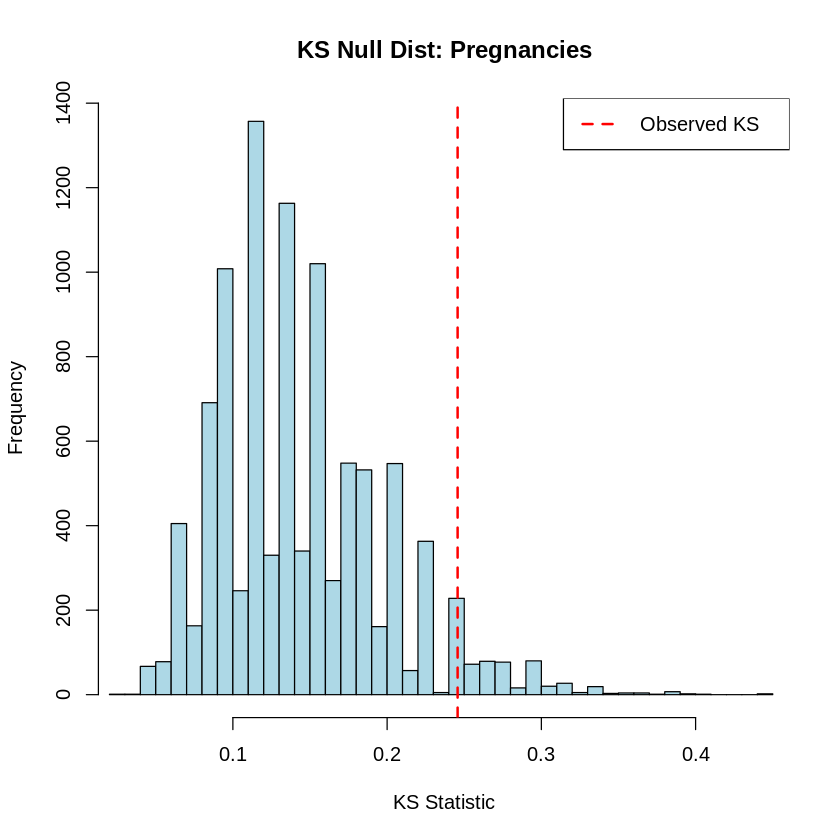

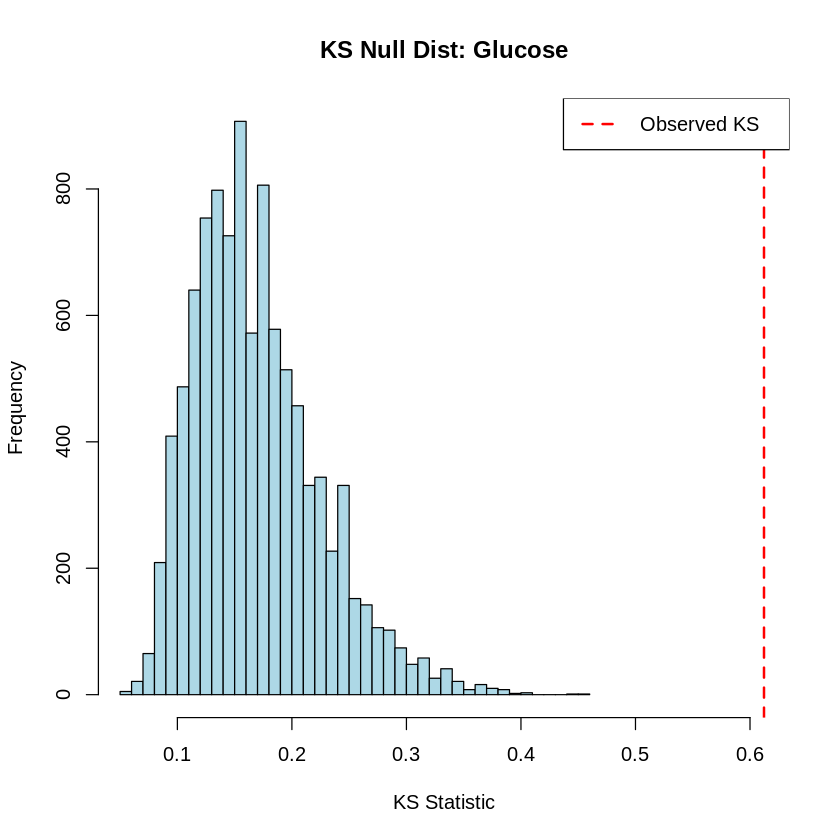

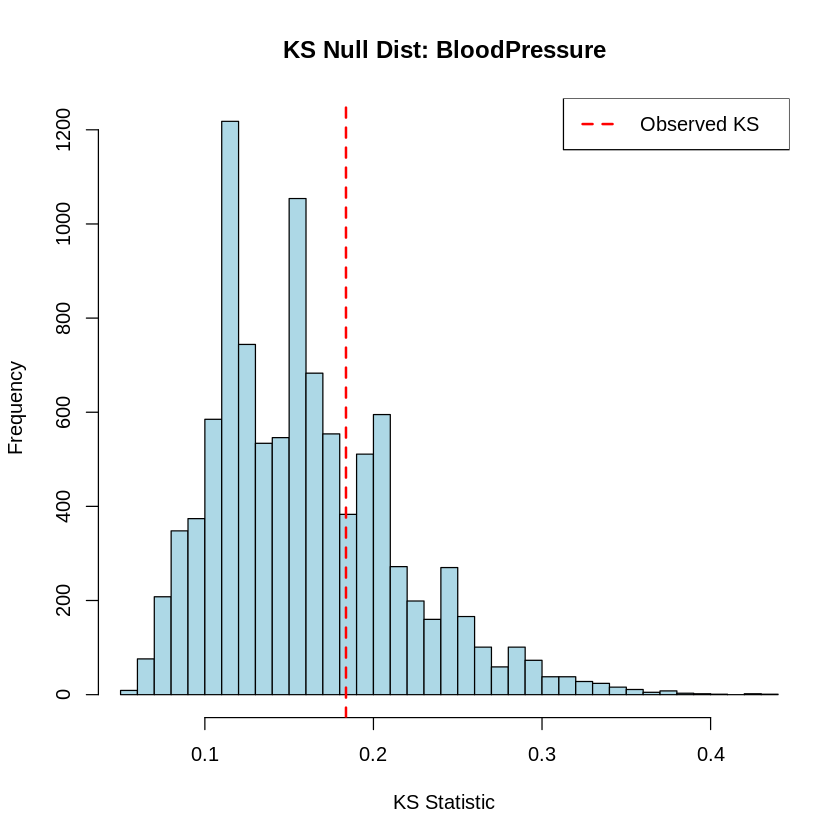

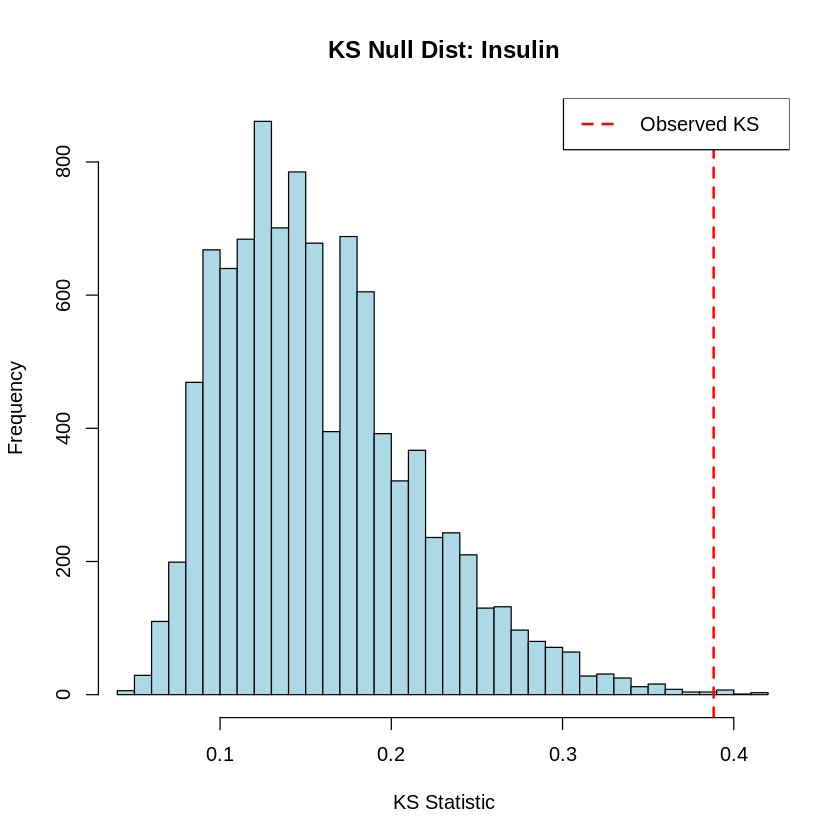

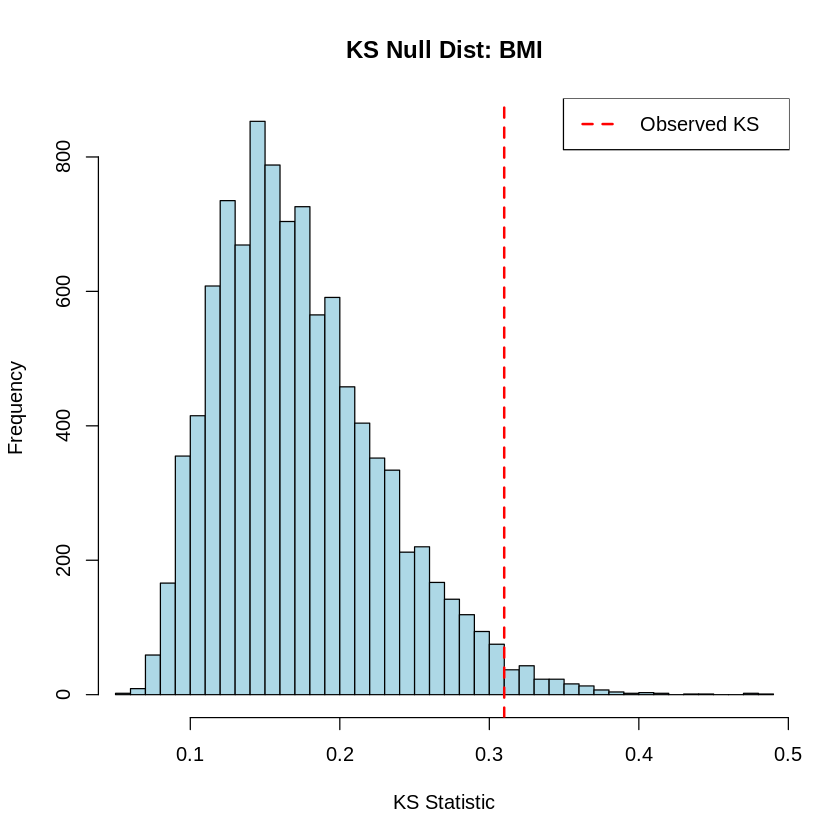

In [ ]:
for (col in cols) {
  D <- null_distributions[[col]]
  D0 <- observed_stats[[col]]

  hist(D, breaks = 50, col = "lightblue",
       main = paste("KS Null Dist:", col),
       xlab = "KS Statistic", xlim = range(c(D, D0)))
  abline(v = D0, col = "red", lwd = 2, lty = 2)
  legend("topright", legend = "Observed KS", col = "red", lwd = 2, lty = 2)
}


Figure above is the collection of Null distribution of the key features. Firstly, the observed KS of Pregnancies is lies within the tail of the distribution, indicating that while the observed difference between the distribution of individuals with and without diabetes is relatively large, it is still not sufficient to confidently reject the null hypothesis.

Glucose on the other hand have an observed KS at 0.6 there is atleast 60% maximum difference between the cumulative distributions of Glucose with and without diabetes. This means that the Glucose level of indiviuals with and without diabetes are largely different, which supports the rejection of the null hypothesis.

Bloodpressure have the observed KS at approximately 0.18, indicating a very low difference between the cumulative distribution. This means that the blood pressure of individuals are not necessarily different.

Insulin have the observed KS at approximately 0.38, reflecting a moderate divergence of the distribution between individuals with and without diabetes. This suggests that individuals that are diabetic and non-diabetic have a relatively large difference on insulin levels.

BMI have the observed KS at approximately 0.31, also reflecting a moderate divergence of the distribution between individuals with and without diabetes. Similar to the Insulin, this suggests that the individuals that are diabetic and non-diabetic have a relatively large differenc on BMI levels, although slightly less strongly than insulin.


Overall, the figures justifies the empirical p-values given from the KS test using permutation approach. Moreover, it is also justified with the initial multiple logistic regression made from

## MCMC for Bayesian Inference

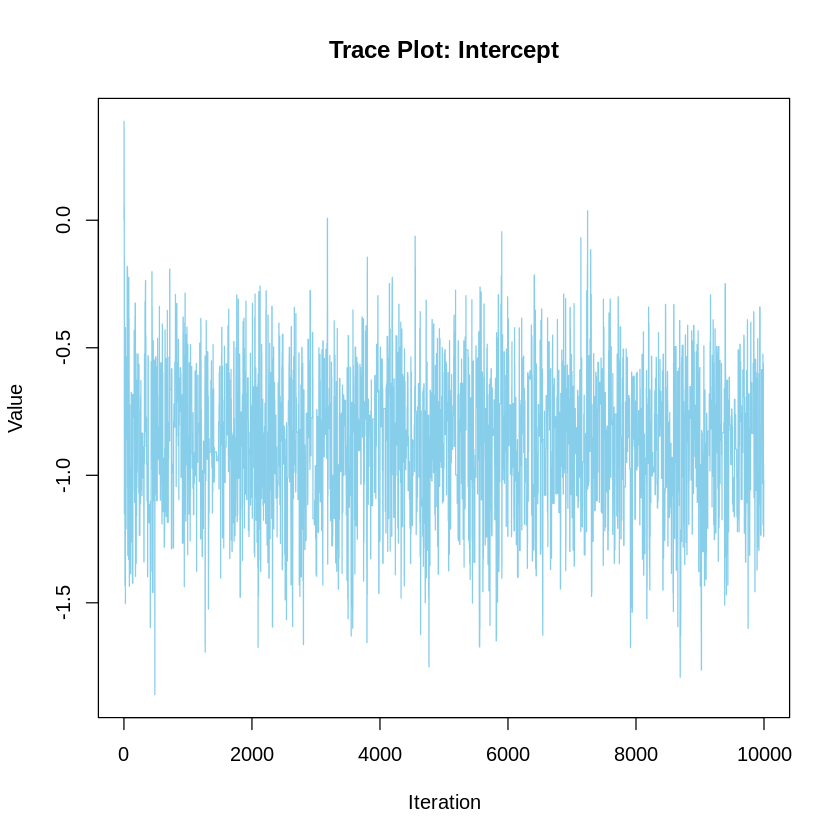

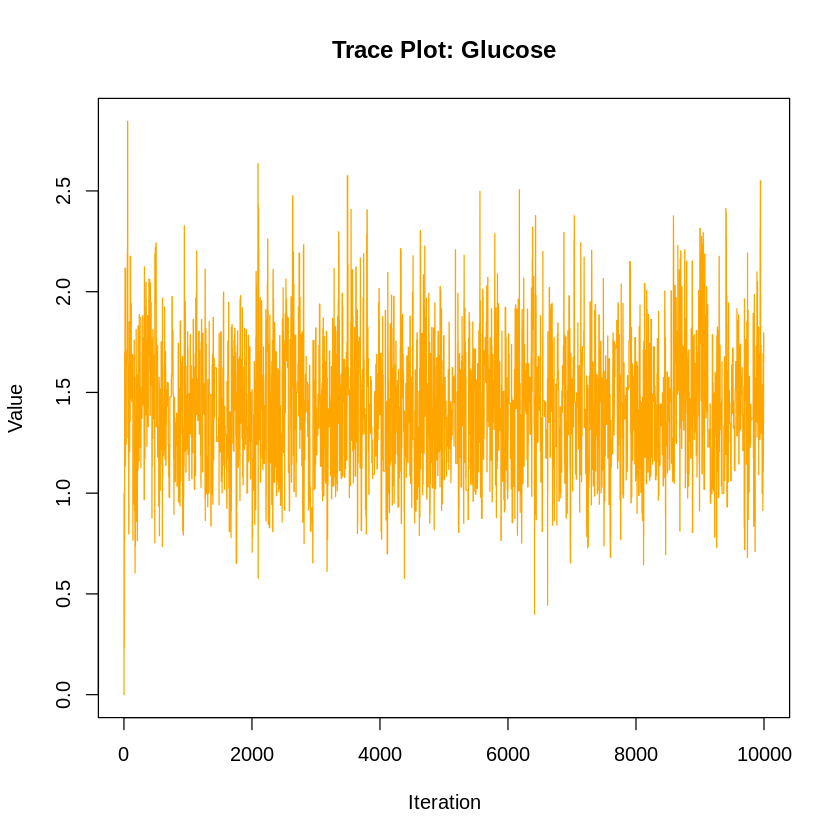

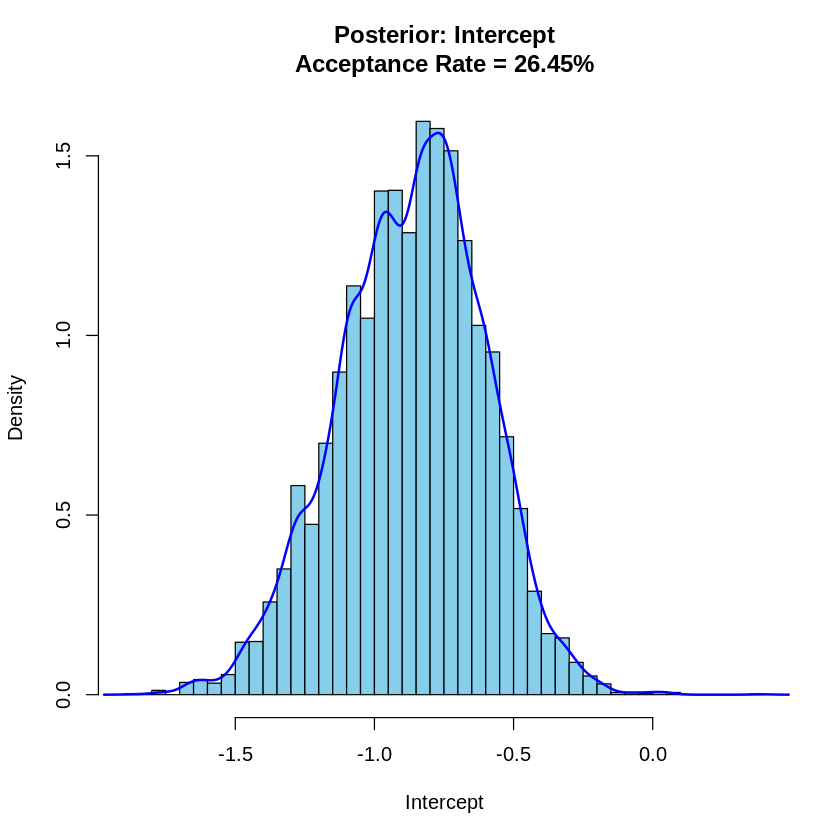

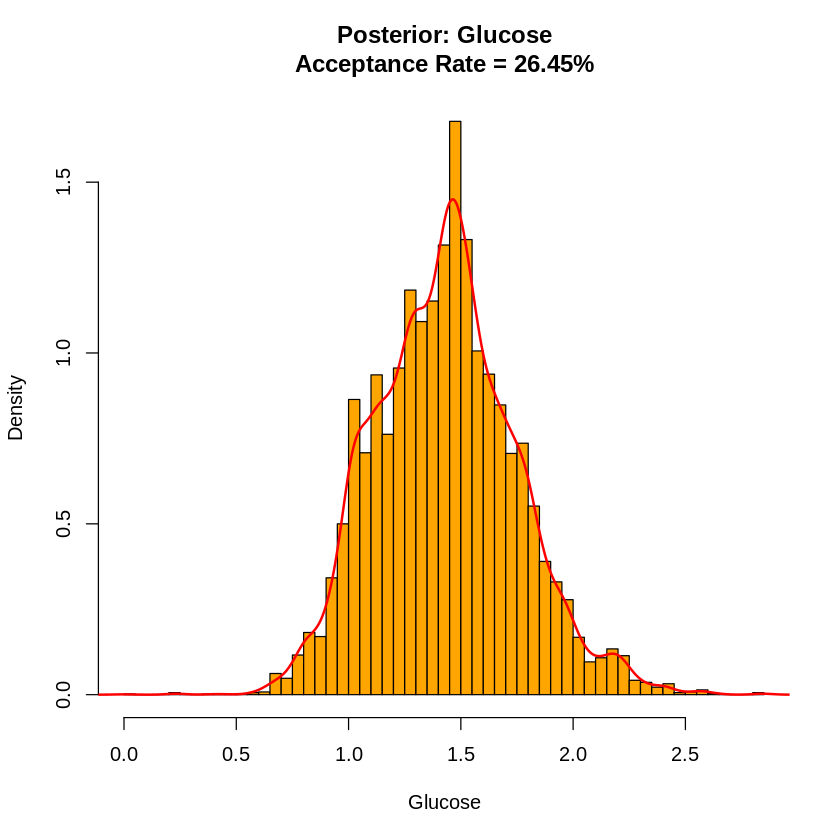

In [ ]:
y <- df_sampled$Outcome
x <- scale(df_sampled$Glucose)

target <- function(beta) {
  beta0 <- beta[1]
  beta1 <- beta[2]
  formula <- beta0 + beta1 * x
  p <- 1 / (1 + exp(-formula))

  log_like <- sum(dbinom(y, size = 1, prob = p, log = TRUE))

  log_prior <- dnorm(beta0, 0, 10, log = TRUE) + dnorm(beta1, 0, 10, log = TRUE)

  return(log_like + log_prior)
}

n_iter <- 10000
beta <- matrix(NA, ncol = 2, nrow = n_iter)
beta[1, ] <- c(0, 0)

k <- 0
u <- runif(n_iter)

for (i in 2:n_iter) {
  current <- beta[i - 1, ]
    proposal <- current + rnorm(2, mean = 0, sd = 0.6)

  log_ratio <- target(proposal) - target(current)

  if (u[i] < exp(log_ratio)) {
    beta[i, ] <- proposal
  } else {
    beta[i, ] <- current
    k <- k + 1
  }
}

posterior_df <- as.data.frame(beta)
colnames(posterior_df) <- c("Intercept", "Glucose")

acceptance_rate <- round(100 * (1 - k / n_iter), 2)

plot(posterior_df$Intercept, type = "l", col = "skyblue",
     main = "Trace Plot: Intercept", xlab = "Iteration", ylab = "Value")
plot(posterior_df$Glucose, type = "l", col = "orange",
     main = "Trace Plot: Glucose", xlab = "Iteration", ylab = "Value")


hist(posterior_df$Intercept, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Intercept\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "skyblue", xlab = "Intercept")
lines(density(posterior_df$Intercept), col = "blue", lwd = 2)

hist(posterior_df$Glucose, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Glucose\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "orange", xlab = "Glucose")
lines(density(posterior_df$Glucose), col = "red", lwd = 2)

Figures above shows the trace plots of the intercept and glucose as well as their posterior distributions. Firstly, the trace plot of the intercept fluctuates on the values near -1. Moreover, there is no visible drift or trend on the chain indicating that the sample are well-mixed and convergent.

Similarly, the trace plot of the glucose hovers around 1.5 with no visible stretches and trends which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -1.2 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when glucose is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the glucose's values centers around 1.5 indicating that the glucose have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.


Overall, the trace plots shows a well-mixed and convergent posterior as well as having a roughly symmetric distribution with a good acceptance rate (Given that the MCMC used is Metropolis-Hastings).

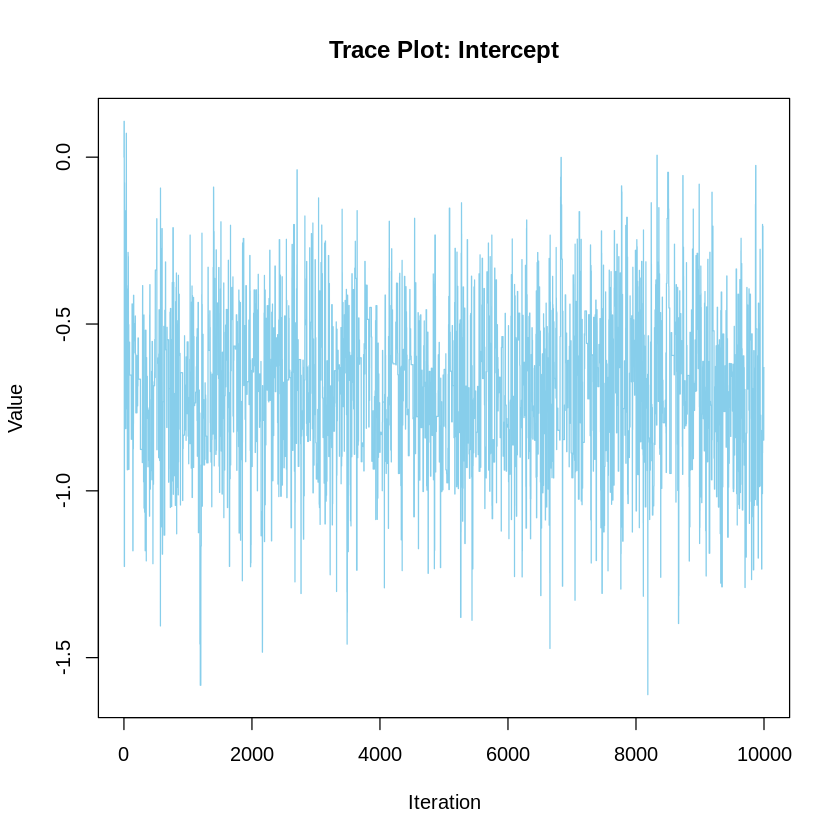

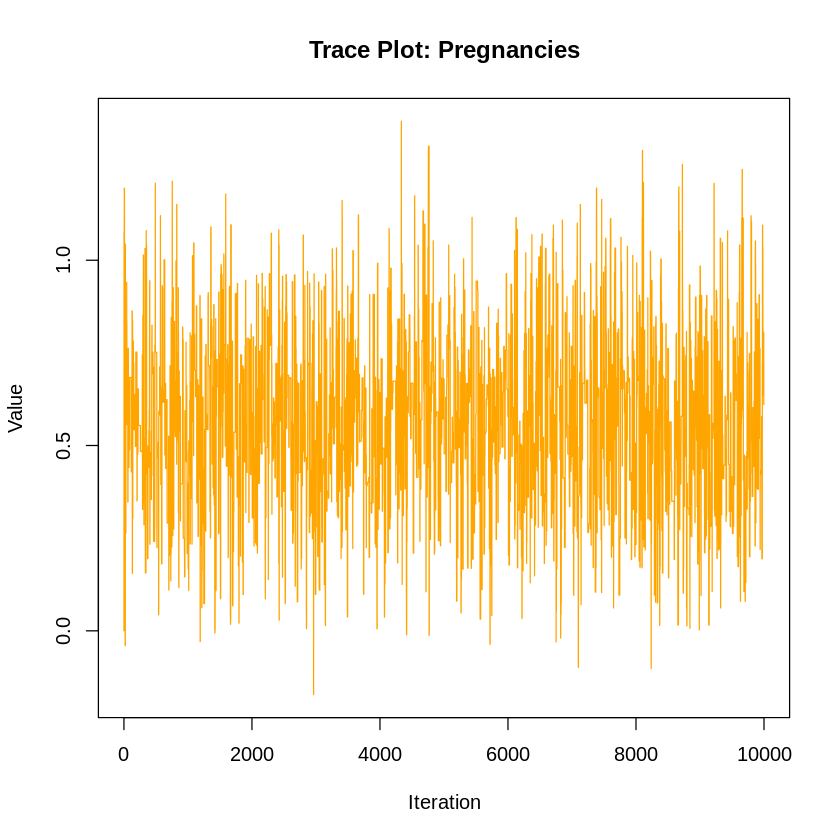

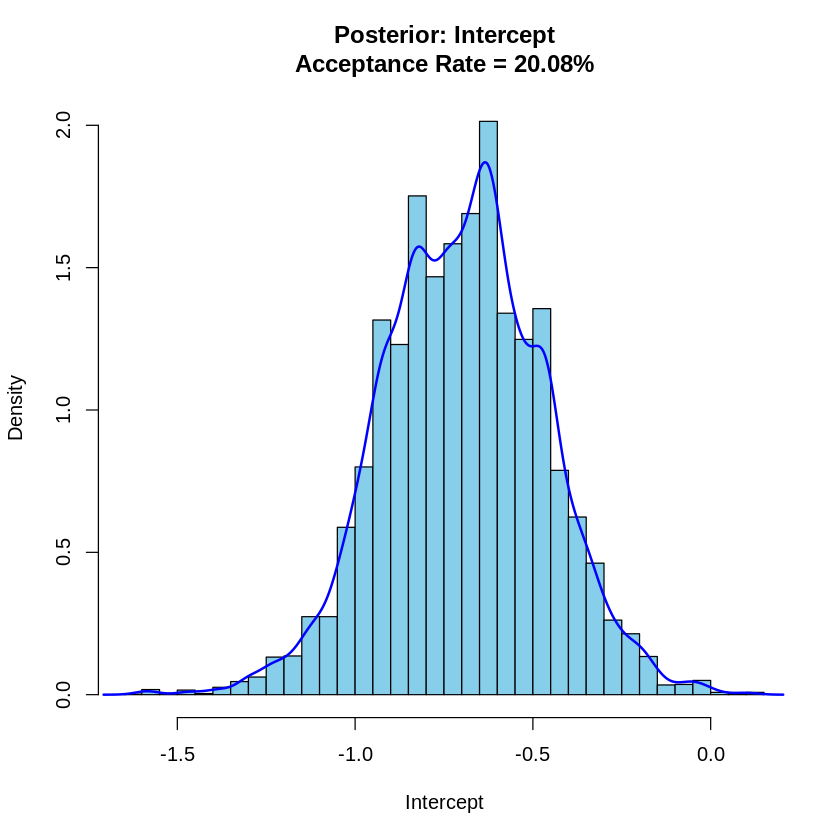

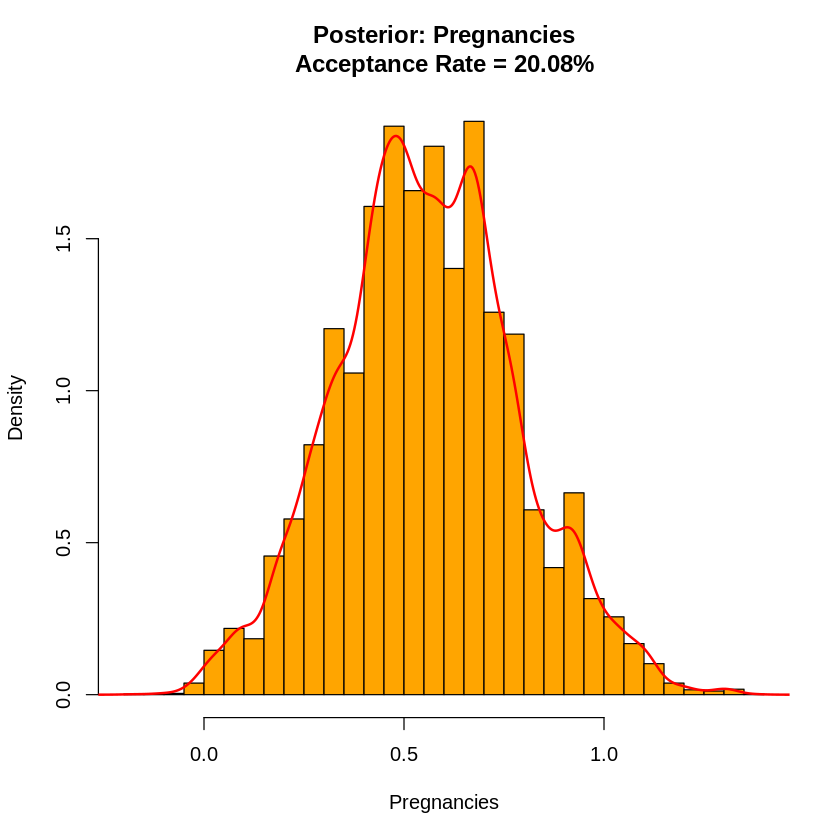

In [ ]:
y <- df_sampled$Outcome
x <- scale(df_sampled$Pregnancies)


n_iter <- 10000
beta <- matrix(NA, ncol = 2, nrow = n_iter)
beta[1, ] <- c(0, 0)

k <- 0
u <- runif(n_iter)

for (i in 2:n_iter) {
  current <- beta[i - 1, ]
    proposal <- current + rnorm(2, mean = 0, sd = 0.6)

  log_ratio <- target(proposal) - target(current)

  if (u[i] < exp(log_ratio)) {
    beta[i, ] <- proposal
  } else {
    beta[i, ] <- current
    k <- k + 1
  }
}

posterior_df <- as.data.frame(beta)
colnames(posterior_df) <- c("Intercept", "Pregnancies")

acceptance_rate <- round(100 * (1 - k / n_iter), 2)

plot(posterior_df$Intercept, type = "l", col = "skyblue",
     main = "Trace Plot: Intercept", xlab = "Iteration", ylab = "Value")
plot(posterior_df$Pregnancies, type = "l", col = "orange",
     main = "Trace Plot: Pregnancies", xlab = "Iteration", ylab = "Value")


hist(posterior_df$Intercept, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Intercept\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "skyblue", xlab = "Intercept")
lines(density(posterior_df$Intercept), col = "blue", lwd = 2)

hist(posterior_df$Pregnancies, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Pregnancies\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "orange", xlab = "Pregnancies")
lines(density(posterior_df$Pregnancies), col = "red", lwd = 2)

Figures above shows the trace plots of the intercept and pregnancies as well as their posterior distributions. Firstly, the trace plot of the intercept fluctuates on the values near -0.7. Moreover, there is no visible drift or trend on the chain indicating that the sample are well-mixed and convergent.

Similarly, the trace plot of the pregnancies hovers around 0.5 with no visible stretches and trends which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.7 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when pregnancies is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the pregnancy's values centers around 0.5 indicating that the Pregnancies have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well. However, there is a shallow 2nd peak around 0.7 indicating a lumpy unimodal but generally still consistent.


Overall, the trace plots shows a well-mixed and convergent posterior as well as having a roughly symmetric distribution with a good acceptance rate.


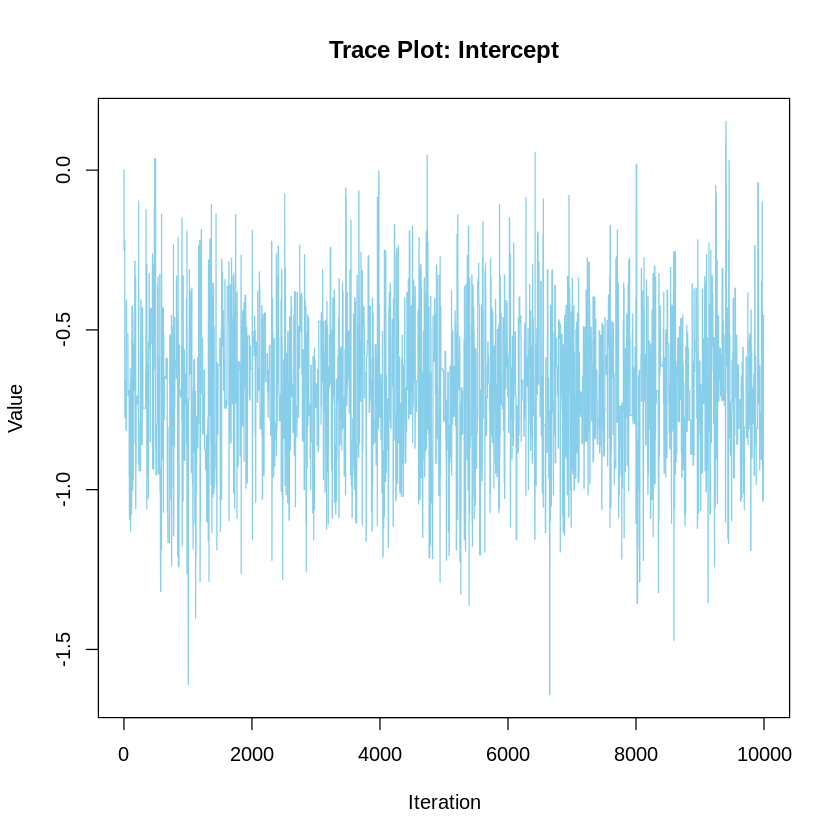

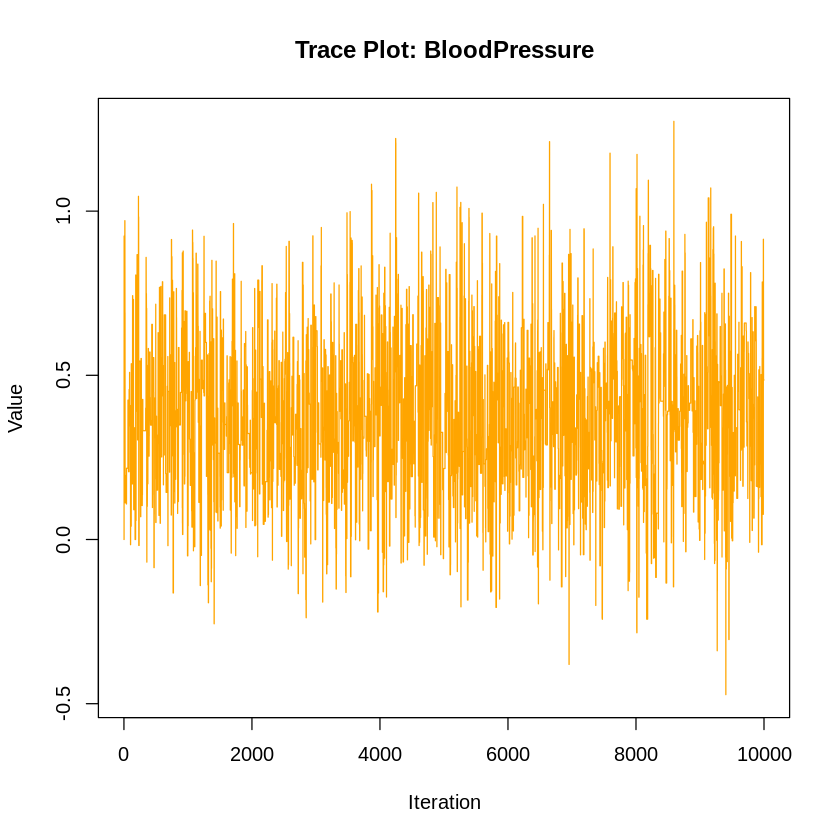

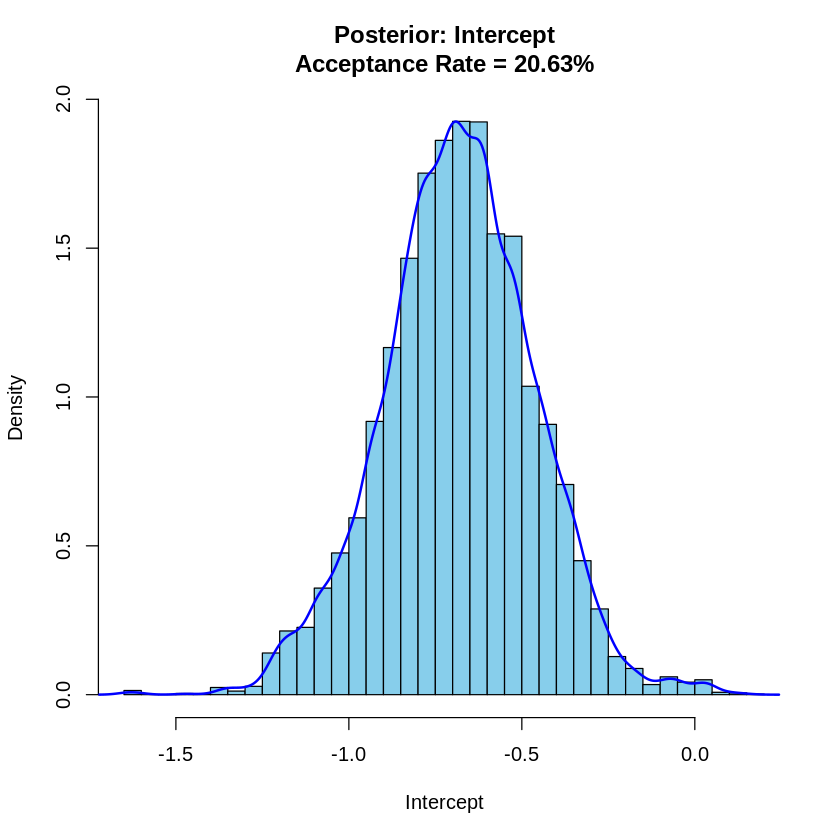

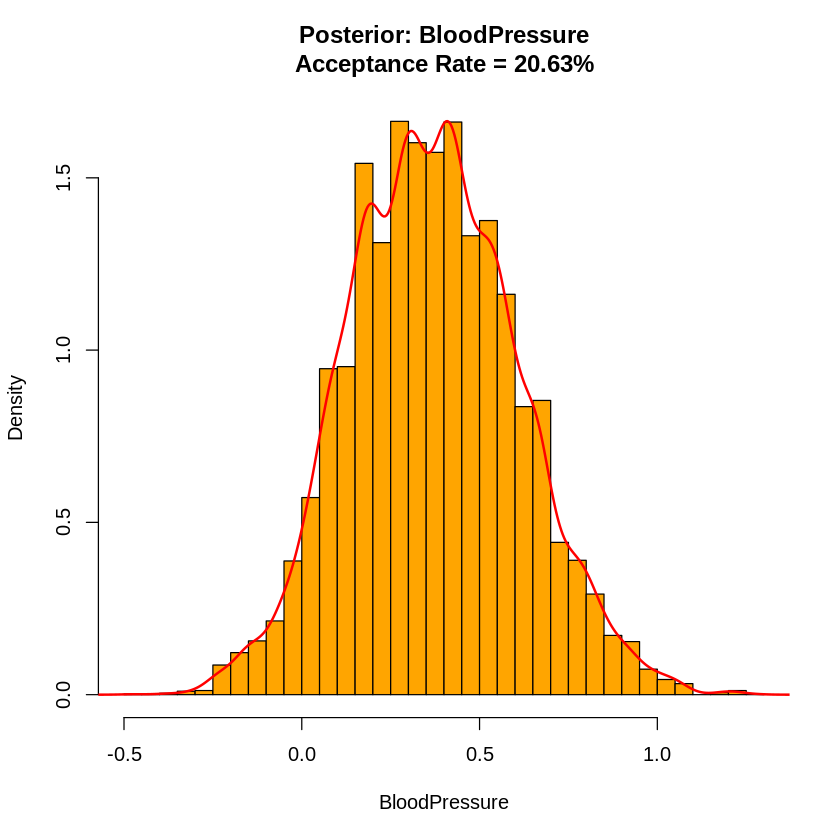

In [ ]:
y <- df_sampled$Outcome
x <- scale(df_sampled$BloodPressure)


n_iter <- 10000
beta <- matrix(NA, ncol = 2, nrow = n_iter)
beta[1, ] <- c(0, 0)

k <- 0
u <- runif(n_iter)

for (i in 2:n_iter) {
  current <- beta[i - 1, ]
    proposal <- current + rnorm(2, mean = 0, sd = 0.6)

  log_ratio <- target(proposal) - target(current)

  if (u[i] < exp(log_ratio)) {
    beta[i, ] <- proposal
  } else {
    beta[i, ] <- current
    k <- k + 1
  }
}

posterior_df <- as.data.frame(beta)
colnames(posterior_df) <- c("Intercept", "BloodPressure")

acceptance_rate <- round(100 * (1 - k / n_iter), 2)


plot(posterior_df$Intercept, type = "l", col = "skyblue",
     main = "Trace Plot: Intercept", xlab = "Iteration", ylab = "Value")
plot(posterior_df$BloodPressure, type = "l", col = "orange",
     main = "Trace Plot: BloodPressure", xlab = "Iteration", ylab = "Value")


hist(posterior_df$Intercept, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Intercept\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "skyblue", xlab = "Intercept")
lines(density(posterior_df$Intercept), col = "blue", lwd = 2)

hist(posterior_df$BloodPressure, breaks = 50, probability = TRUE,
     main = paste0("Posterior: BloodPressure\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "orange", xlab = "BloodPressure")
lines(density(posterior_df$BloodPressure), col = "red", lwd = 2)

Figures above shows the trace plots of the intercept and BloodPressure as well as their posterior distributions. Firstly, the trace plot of the intercept fluctuates on the values near -0.7. Moreover, there is no visible drift or trend on the chain indicating that the sample are well-mixed and convergent.

Similarly, the trace plot of the BloodPressure hovers around 0.3 with no visible stretches and trends which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.7 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when BloodPressure is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well. However, there is a shallow 2nd peak as well around 0.6 indicating a lumpy unimodal but generally still consistent.

On the other hand, the posterior distribution of the BloodPressure's values centers around 0.3 indicating that the BloodPressure have a positive relationship on the odds of having diabetes. However, it may still be uncertain or not entirely confident since the empirical p-value shows the BloodPressure as insignificant. Therefore, there is still not enough to conclude significance to whether it has effect on diabetes.


Overall, the trace plots shows a well-mixed and convergent posterior as well as having a roughly symmetric distribution with a good acceptance rate.


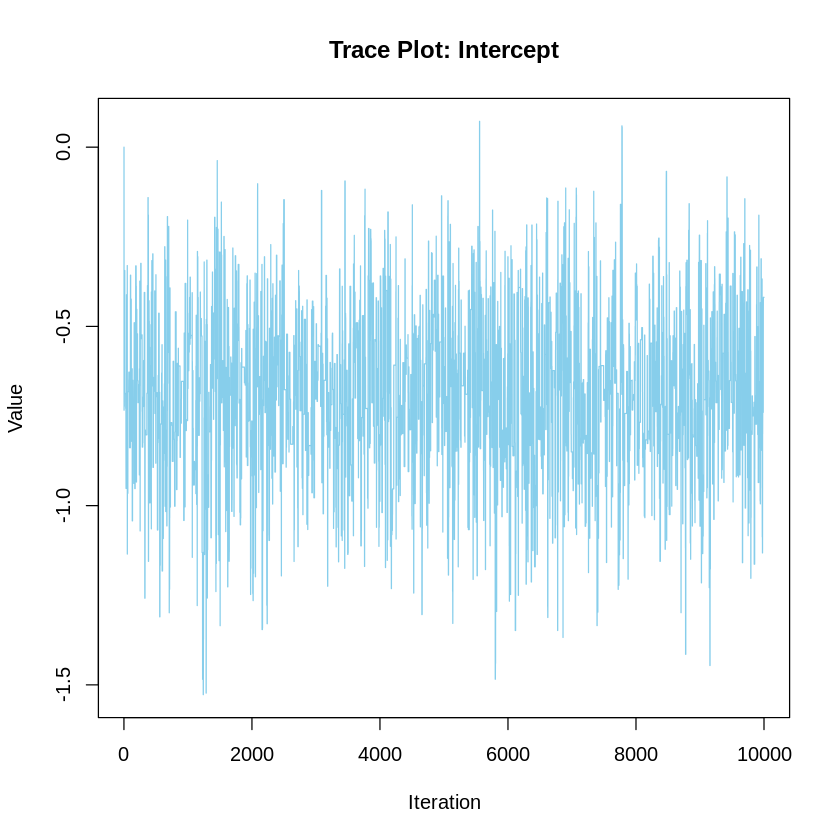

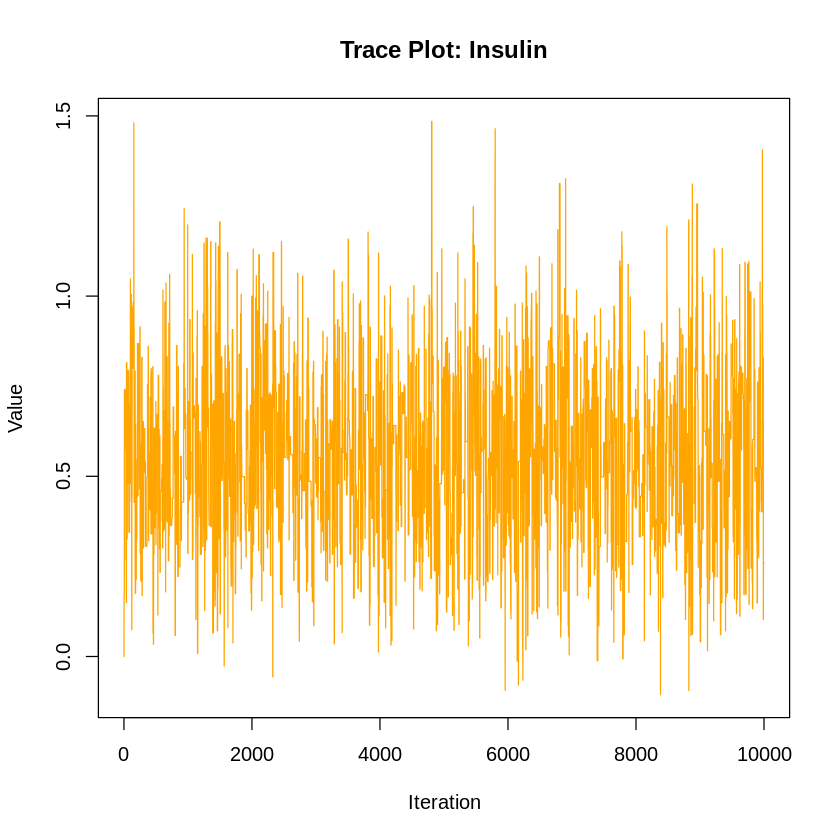

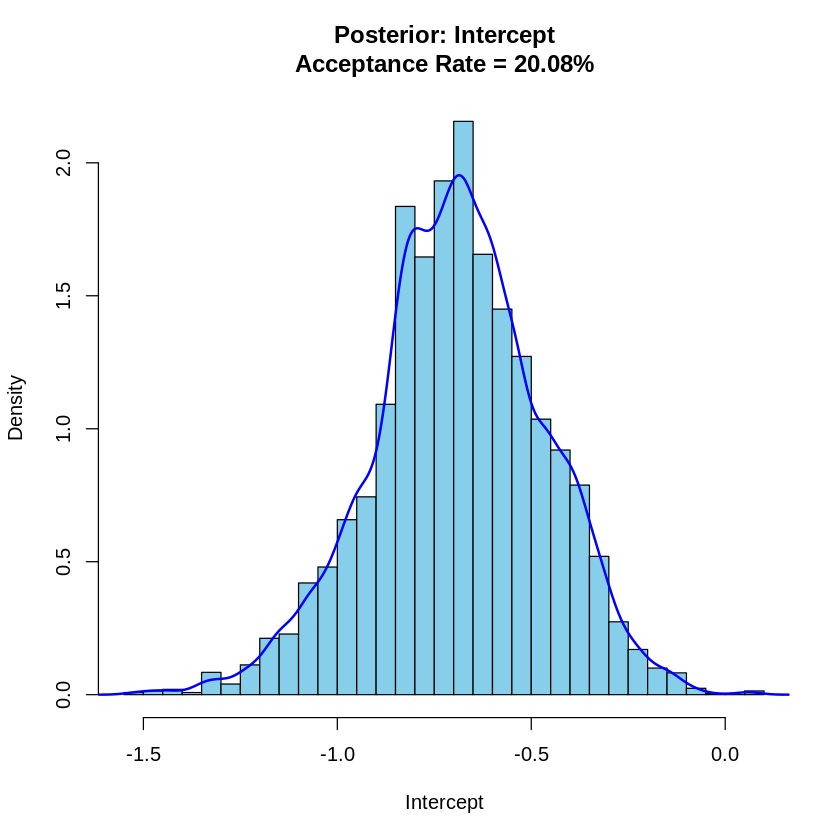

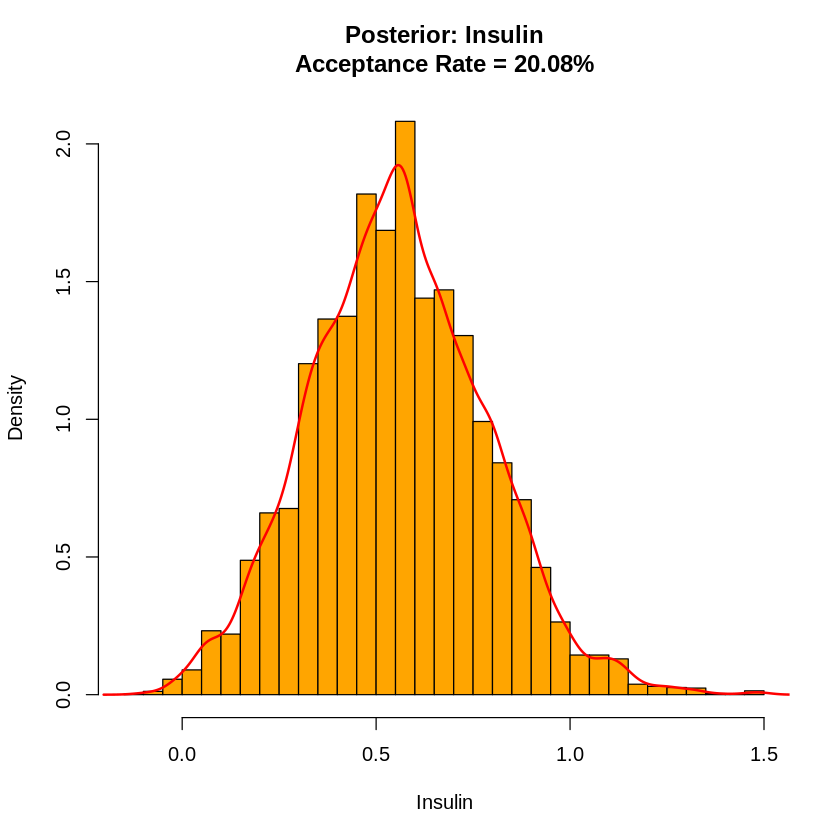

In [ ]:
y <- df_sampled$Outcome
x <- scale(df_sampled$Insulin)


n_iter <- 10000
beta <- matrix(NA, ncol = 2, nrow = n_iter)
beta[1, ] <- c(0, 0)

k <- 0
u <- runif(n_iter)

for (i in 2:n_iter) {
  current <- beta[i - 1, ]
    proposal <- current + rnorm(2, mean = 0, sd = 0.6)

  log_ratio <- target(proposal) - target(current)

  if (u[i] < exp(log_ratio)) {
    beta[i, ] <- proposal
  } else {
    beta[i, ] <- current
    k <- k + 1
  }
}

posterior_df <- as.data.frame(beta)
colnames(posterior_df) <- c("Intercept", "Insulin")

acceptance_rate <- round(100 * (1 - k / n_iter), 2)

plot(posterior_df$Intercept, type = "l", col = "skyblue",
     main = "Trace Plot: Intercept", xlab = "Iteration", ylab = "Value")
plot(posterior_df$Insulin, type = "l", col = "orange",
     main = "Trace Plot: Insulin", xlab = "Iteration", ylab = "Value")


hist(posterior_df$Intercept, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Intercept\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "skyblue", xlab = "Intercept")
lines(density(posterior_df$Intercept), col = "blue", lwd = 2)

hist(posterior_df$Insulin, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Insulin\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "orange", xlab = "Insulin")
lines(density(posterior_df$Insulin), col = "red", lwd = 2)

Figures above shows the trace plots of the intercept and Insulin as well as their posterior distributions. Firstly, the trace plot of the intercept fluctuates on the values near -0.6. Moreover, there is no visible drift or trend on the chain indicating that the sample are well-mixed and convergent.

Similarly, the trace plot of the Insulin hovers around 0.5 with no visible stretches and trends which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.6 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when Insulin is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the Insulin's values centers around 0.5 indicating that the Insulin have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.


Overall, the trace plots shows a well-mixed and convergent posterior as well as having a roughly symmetric distribution with a good acceptance rate.

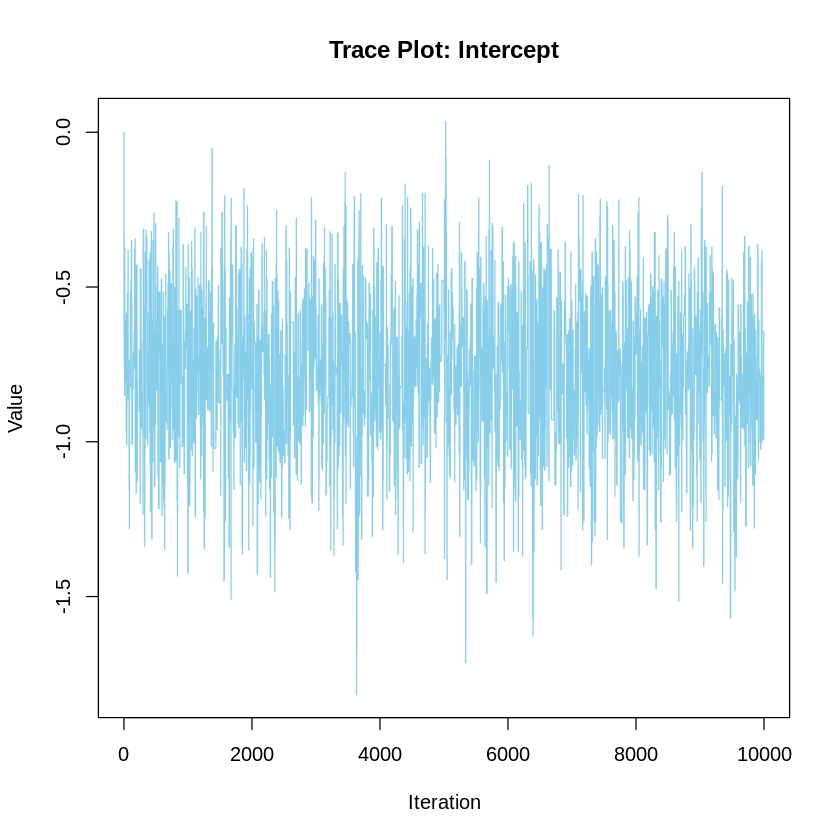

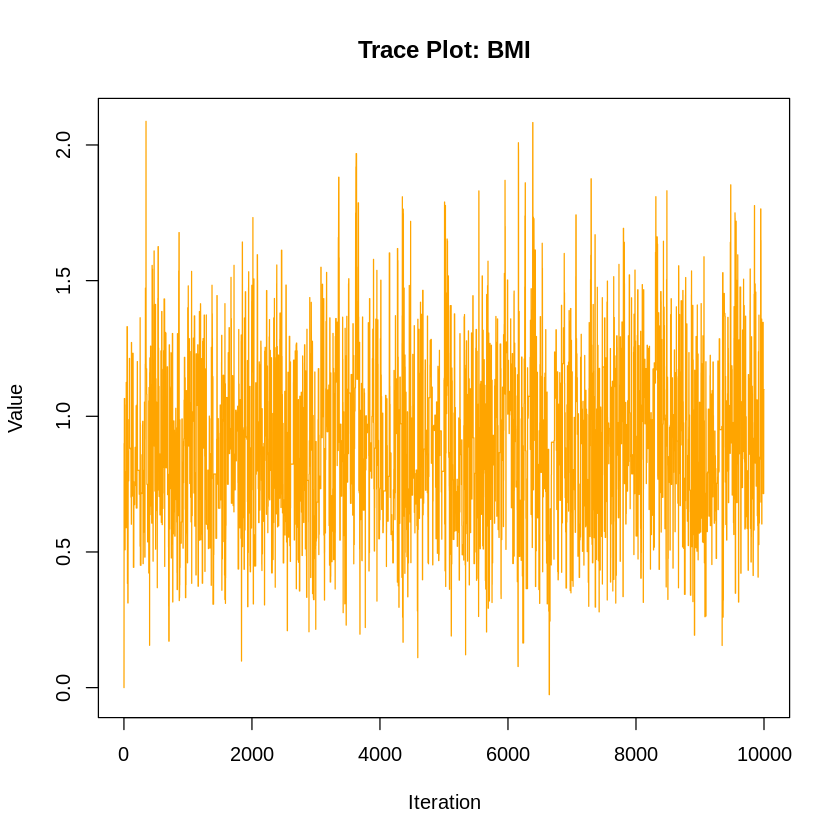

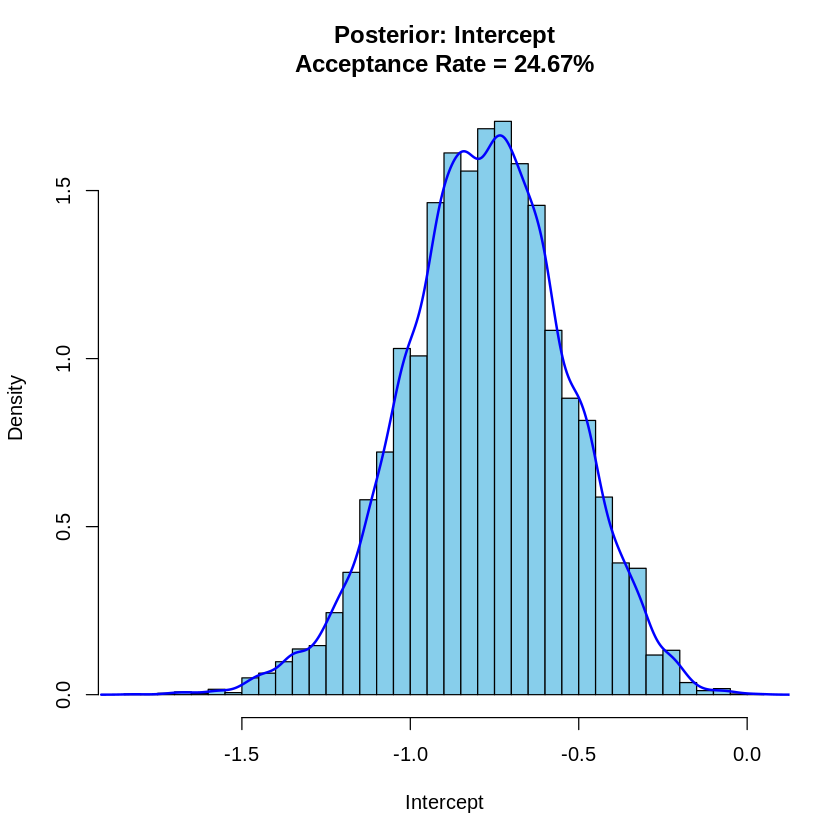

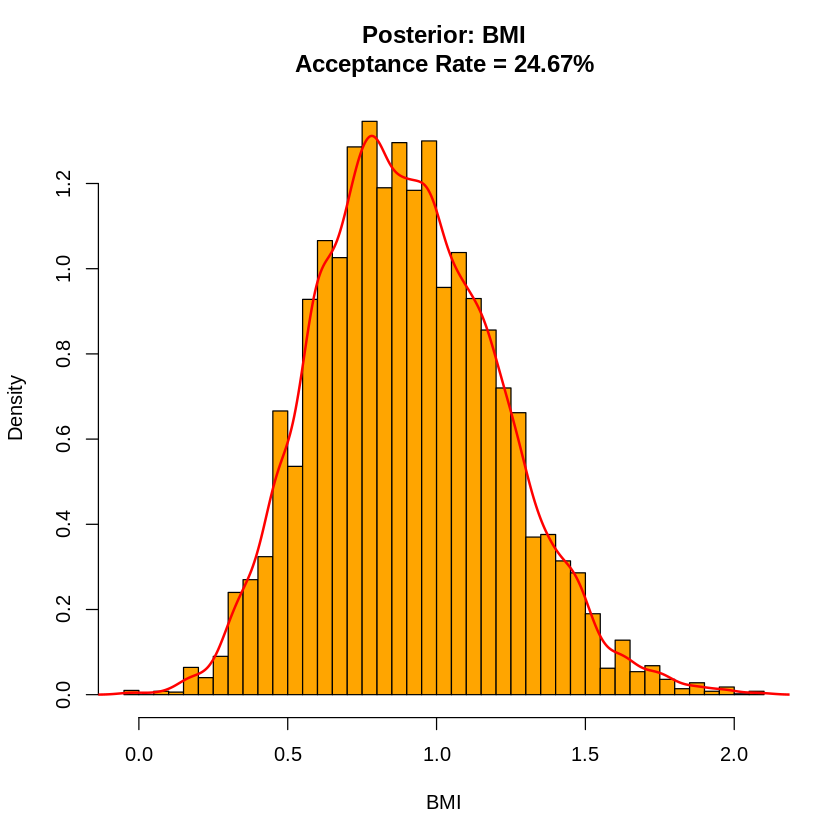

In [ ]:
y <- df_sampled$Outcome
x <- scale(df_sampled$BMI)


n_iter <- 10000
beta <- matrix(NA, ncol = 2, nrow = n_iter)
beta[1, ] <- c(0, 0)

k <- 0
u <- runif(n_iter)

for (i in 2:n_iter) {
  current <- beta[i - 1, ]
    proposal <- current + rnorm(2, mean = 0, sd = 0.6)

  log_ratio <- target(proposal) - target(current)

  if (u[i] < exp(log_ratio)) {
    beta[i, ] <- proposal
  } else {
    beta[i, ] <- current
    k <- k + 1
  }
}

posterior_df <- as.data.frame(beta)
colnames(posterior_df) <- c("Intercept", "BMI")

acceptance_rate <- round(100 * (1 - k / n_iter), 2)

plot(posterior_df$Intercept, type = "l", col = "skyblue",
     main = "Trace Plot: Intercept", xlab = "Iteration", ylab = "Value")
plot(posterior_df$BMI, type = "l", col = "orange",
     main = "Trace Plot: BMI", xlab = "Iteration", ylab = "Value")


hist(posterior_df$Intercept, breaks = 50, probability = TRUE,
     main = paste0("Posterior: Intercept\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "skyblue", xlab = "Intercept")
lines(density(posterior_df$Intercept), col = "blue", lwd = 2)

hist(posterior_df$BMI, breaks = 50, probability = TRUE,
     main = paste0("Posterior: BMI\nAcceptance Rate = ", acceptance_rate, "%"),
     col = "orange", xlab = "BMI")
lines(density(posterior_df$BMI), col = "red", lwd = 2)

Figures above shows the trace plots of the intercept and BMI as well as their posterior distributions. Firstly, the trace plot of the intercept fluctuates on the values near -0.7. Moreover, there is no visible drift or trend on the chain indicating that the sample are well-mixed and convergent.

Similarly, the trace plot of the BMI hovers around 0.8 with no visible stretches and trends which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.7 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when BMI is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well. However, there is a tiny 2nd peak indicating a slight lump on the distribution, but generally still consistent.

On the other hand, the posterior distribution of the BMI's values centers around 0.8 indicating that the BMI have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.


Overall, the trace plots shows a well-mixed and convergent posterior as well as having a roughly symmetric distribution with a good acceptance rate.



With that, we can also compare the result of the Metropolis-Hasting algorithm to a different algorithm, specifically the Hamiltonian Monte Carlo where it uses gradient-based proposals instead of random walk from the MC algorithm. This means that it leverages the shape and slope to make an informed movement across the entire posterior. With this, it makes the exploration better and faster compared to MH algorithm.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.03 seconds (Warm-up)
Chain 1:                0.03 seconds (Sampling)
Chain 1:                0.06 s

 Family: bernoulli 
  Links: mu = logit 
Formula: Outcome ~ scale(Glucose) 
   Data: df_sampled (Number of observations: 99) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       -0.87      0.27    -1.42    -0.37 1.00     2802     2314
scaleGlucose     1.43      0.32     0.84     2.09 1.00     2982     2619

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

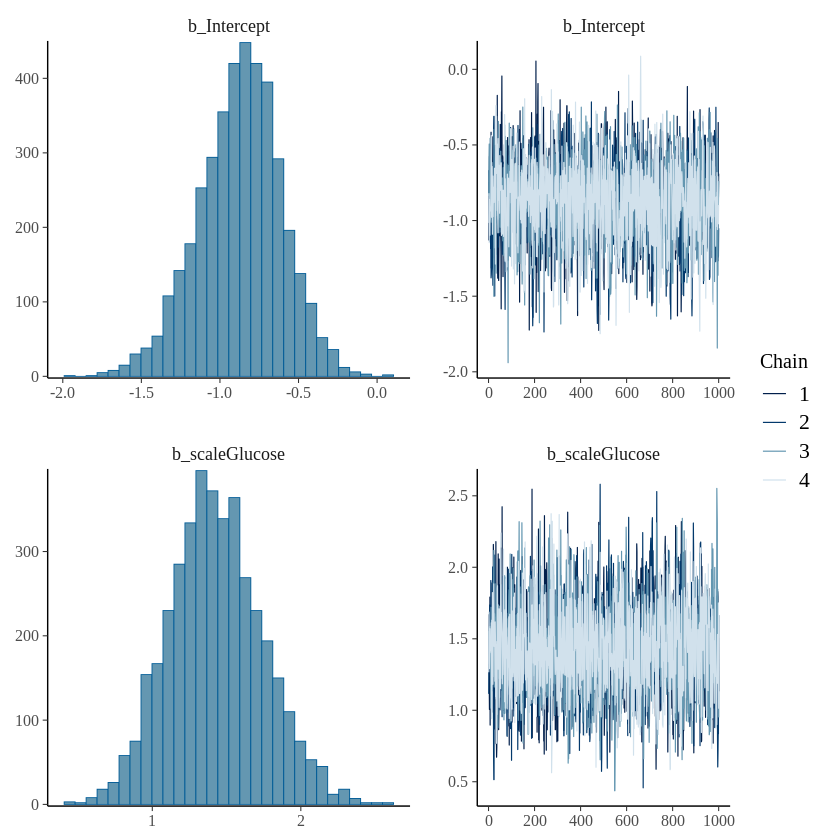

In [ ]:

fit<- bayes_model <- brm(
  formula = Outcome ~ scale(Glucose),
  data = df_sampled,
  family = bernoulli(link = "logit"),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(0, 10), class = "Intercept")
  ),
  chains = 4, iter = 2000, warmup = 1000, seed = 123
)

summary(fit)
plot(fit)

Figures above shows the trace plots of the intercept and Glucose as well as their posterior distributions. Firstly, the summary shows that the scaleGlucose have a positive relationship indicating that for every 1 sd increase in Glucose, the log odds increase by 1.44 of having diabetes. Moreover, the intercept have a negative relationship indicating that when Glucose is 0, the log-odds of having diabetes is -0.87.

The trace plot of the intercept fluctuates on the values near -0.9 on all 4 chains. Moreover, there is no visible drift or trend on the chain indicating that the all 4 chains are well-mixed and convergent.

Similarly, the trace plot of the Glucose hovers around 1.5 with no visible stretches and trends on all 4 chains which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.8 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when Glucose is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the Glucose's values centers around 1.5 indicating that the Glucose have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.043 seconds (Warm-up)
Chain 1:                0.026 seconds (Sampling)
Chain 1:                0.06

 Family: bernoulli 
  Links: mu = logit 
Formula: Outcome ~ scale(Pregnancies) 
   Data: df_sampled (Number of observations: 99) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           -0.69      0.23    -1.15    -0.25 1.00     3064     2319
scalePregnancies     0.56      0.23     0.11     1.01 1.00     3286     2613

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

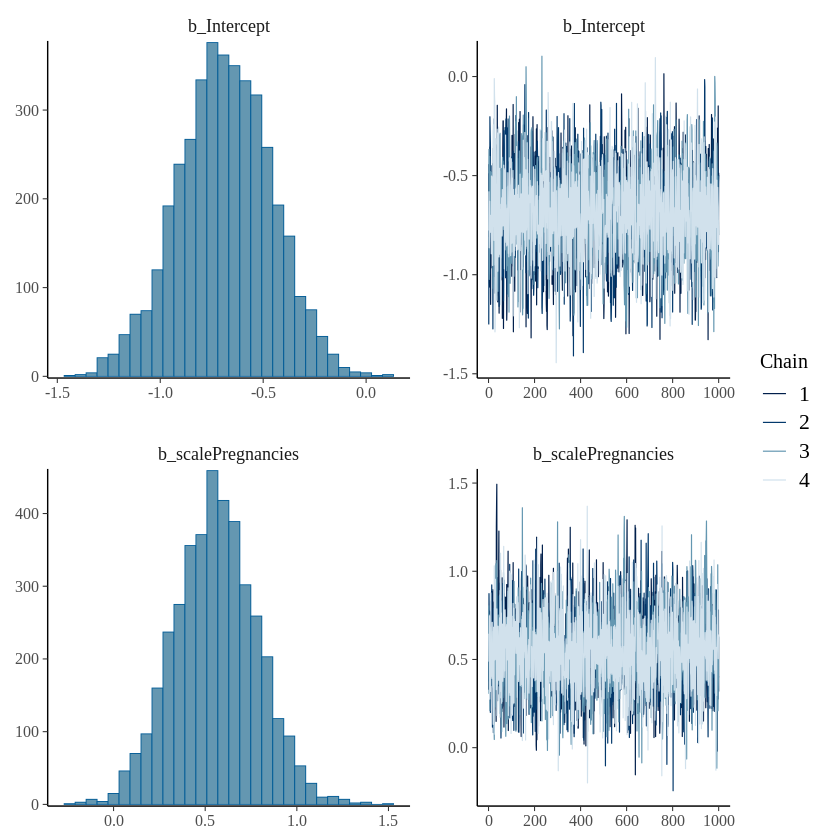

In [ ]:
fit<- bayes_model <- brm(
  formula = Outcome ~ scale(Pregnancies),
  data = df_sampled,
  family = bernoulli(link = "logit"),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(0, 10), class = "Intercept")
  ),
  chains = 4, iter = 2000, warmup = 1000, seed = 123
)


summary(fit)
plot(fit)

Figures above shows the trace plots of the intercept and Pregnancies as well as their posterior distributions. Firstly, the summary shows that the scalePregnancies have a positive relationship indicating that for every 1 sd increase in Pregnancies, the log odds increase by 0.55 of having diabetes. Moreover, the intercept have a negative relationship indicating that when Pregnancies is 0, the log-odds of having diabetes is -0.69.

The trace plot of the intercept fluctuates on the values near -0.6 on all 4 chains. Moreover, there is no visible drift or trend on the chain indicating that the all 4 chains are well-mixed and convergent.

Similarly, the trace plot of the Pregnancies hovers around 0.6 with no visible stretches and trends on all 4 chains which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.6 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when Pregnancies is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the Pregnancy's values centers around 0.6 indicating that the Pregnancies have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.049 seconds (Warm-up)
Chain 1:                0.054 seconds (Sampling)
Chain 1:                0.10

 Family: bernoulli 
  Links: mu = logit 
Formula: Outcome ~ scale(BloodPressure) 
   Data: df_sampled (Number of observations: 99) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
                   Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept             -0.68      0.22    -1.12    -0.24 1.00     3247     2509
scaleBloodPressure     0.38      0.24    -0.07     0.87 1.00     3237     2565

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

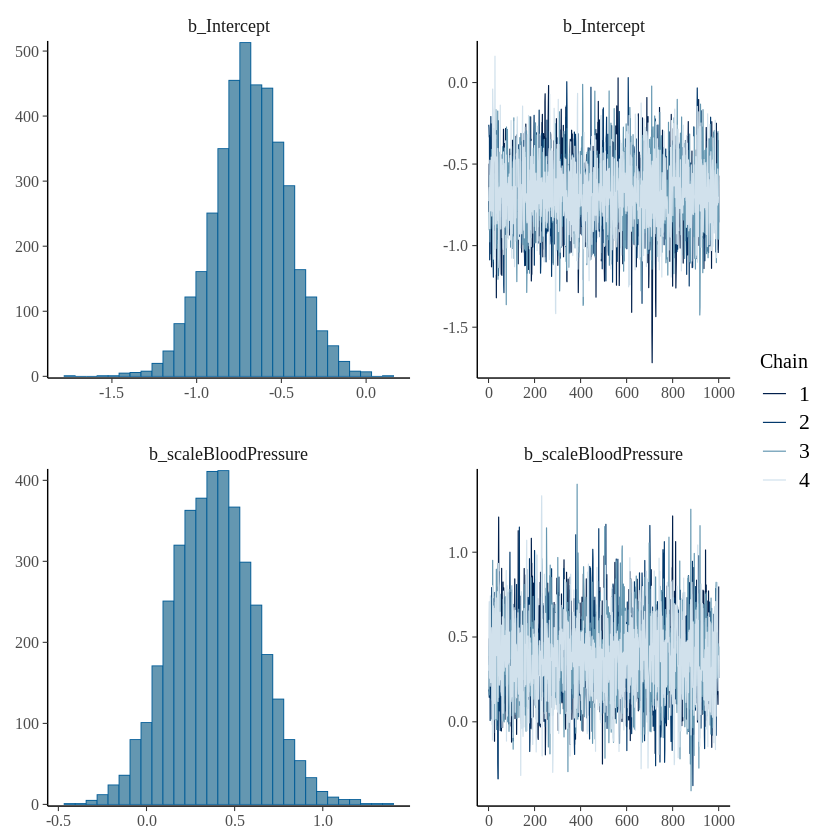

In [ ]:
fit<- bayes_model <- brm(
  formula = Outcome ~ scale(BloodPressure),
  data = df_sampled,
  family = bernoulli(link = "logit"),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(0, 10), class = "Intercept")
  ),
  chains = 4, iter = 2000, warmup = 1000, seed = 123
)


summary(fit)
plot(fit)


Figures above shows the trace plots of the intercept and BloodPressure as well as their posterior distributions. Firstly, the summary shows that the scaleBloodPressure have a positive relationship indicating that for every 1 sd increase in Pregnancies, the log odds increase by 0.39 of having diabetes. However, since the empirical p-value result from the permutation approach is insignificant, it is not confident that the BloodPressure feature necessarily have an effect. Moreover, the intercept have a negative relationship indicating that when BloodPressure is 0, the log-odds of having diabetes is -0.69.

The trace plot of the intercept fluctuates on the values near -0.7 on all 4 chains. Moreover, there is no visible drift or trend on the chain indicating that the all 4 chains are well-mixed and convergent.

Similarly, the trace plot of the BloodPressure hovers around 0.3 with no visible stretches and trends on all 4 chains which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.7 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when BloodPressure is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the BloodPressure's values centers around 0.3 indicating that the BloodPressure have a positive relationship on the odds of having diabetes. With that, due to the result of the empirical p-value, it is not with confidence that the BloodPressure have an effect on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.03 seconds (Warm-up)
Chain 1:                0.03 seconds (Sampling)
Chain 1:                0.06 s

 Family: bernoulli 
  Links: mu = logit 
Formula: Outcome ~ scale(Insulin) 
   Data: df_sampled (Number of observations: 99) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       -0.68      0.23    -1.12    -0.25 1.00     3300     2335
scaleInsulin     0.56      0.23     0.12     1.03 1.00     3441     2378

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

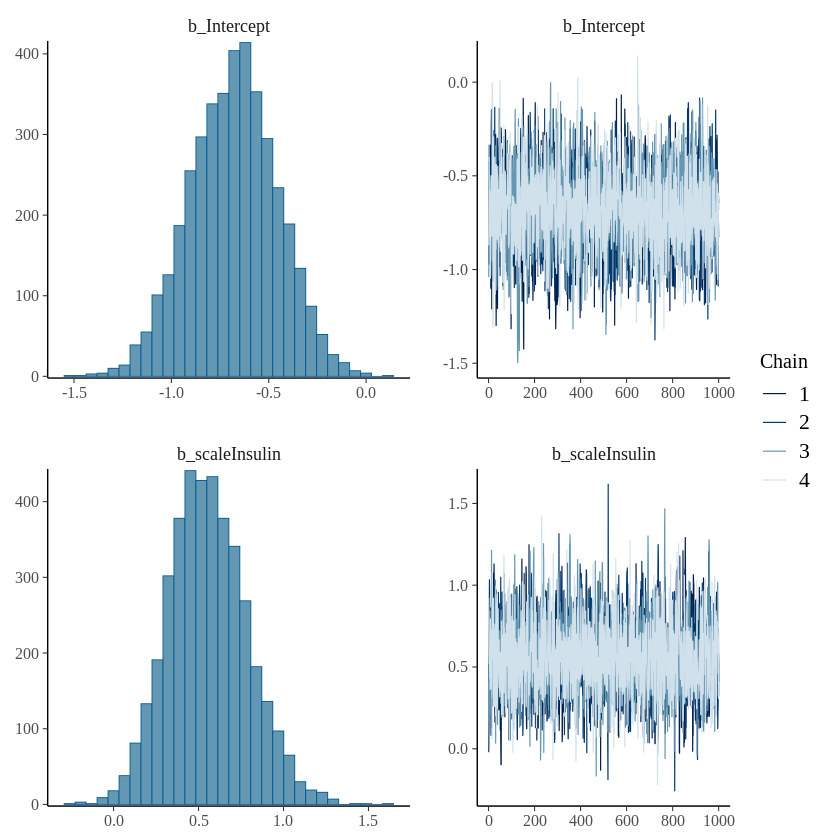

In [ ]:
fit<- bayes_model <- brm(
  formula = Outcome ~ scale(Insulin),
  data = df_sampled,
  family = bernoulli(link = "logit"),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(0, 10), class = "Intercept")
  ),
  chains = 4, iter = 2000, warmup = 1000, seed = 123
)


summary(fit)
plot(fit)

Figures above shows the trace plots of the intercept and Insulin as well as their posterior distributions. Firstly, the summary shows that the scaleInsulin have a positive relationship indicating that for every 1 sd increase in Insulin, the log odds increase by 0.56 of having diabetes. Moreover, the intercept have a negative relationship indicating that when Insulin is 0, the log-odds of having diabetes is -0.68.

The trace plot of the intercept fluctuates on the values near -0.6 on all 4 chains. Moreover, there is no visible drift or trend on the chain indicating that the all 4 chains are well-mixed and convergent.

Similarly, the trace plot of the Insulin hovers around 0.6 with no visible stretches and trends on all 4 chains which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.6 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when Insulin is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the Insulin's values centers around 0.6 indicating that the Insulin have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.053 seconds (Warm-up)
Chain 1:                0.053 seconds (Sampling)
Chain 1:                0.106 s

 Family: bernoulli 
  Links: mu = logit 
Formula: Outcome ~ scale(BMI) 
   Data: df_sampled (Number of observations: 99) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.77      0.24    -1.26    -0.33 1.00     2689     2595
scaleBMI      0.89      0.29     0.33     1.49 1.00     2889     2598

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

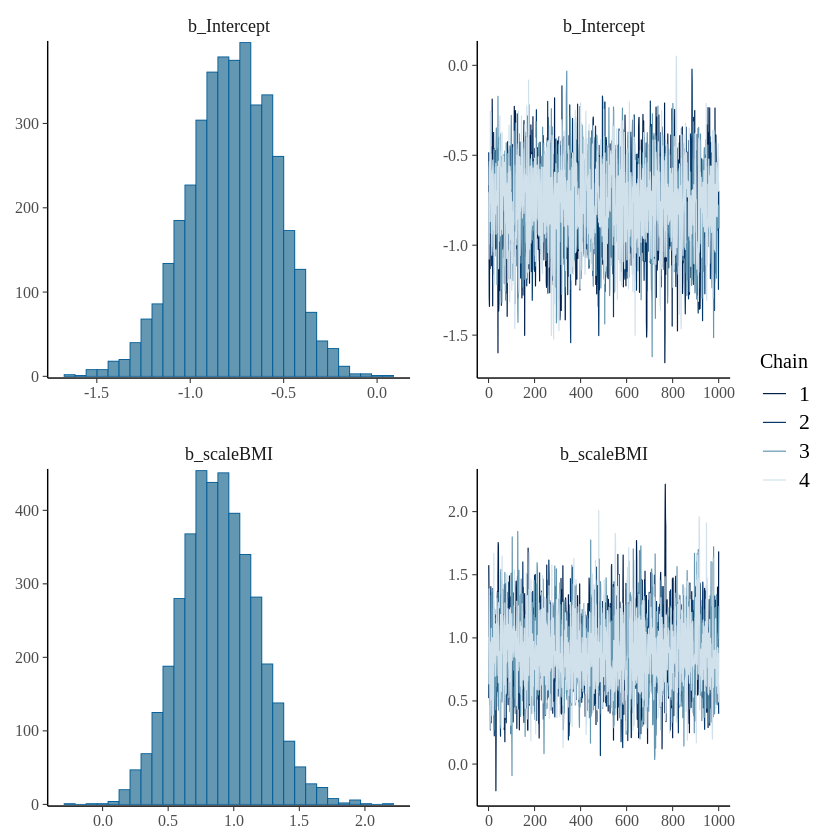

In [ ]:
fit<- bayes_model <- brm(
  formula = Outcome ~ scale(BMI),
  data = df_sampled,
  family = bernoulli(link = "logit"),
  prior = c(
    prior(normal(0, 10), class = "b"),
    prior(normal(0, 10), class = "Intercept")
  ),
  chains = 4, iter = 2000, warmup = 1000, seed = 123
)


summary(fit)
plot(fit)

Figures above shows the trace plots of the intercept and BMI as well as their posterior distributions. Firstly, the summary shows that the scaleBMI have a positive relationship indicating that for every 1 sd increase in BMI, the log odds increase by 0.90 of having diabetes. Moreover, the intercept have a negative relationship indicating that when BMI is 0, the log-odds of having diabetes is -0.78.

The trace plot of the intercept fluctuates on the values near -0.6 on all 4 chains. Moreover, there is no visible drift or trend on the chain indicating that the all 4 chains are well-mixed and convergent.

Similarly, the trace plot of the BMI hovers around 0.9 with no visible stretches and trends on all 4 chains which indicates a good exploration of the posterior. This means that both trace plot have mixed well and is convergent.

For the posterior distribution of the intercept, the values centers around -0.8 indicating that the intercept have a high confidence negative relationship on the odds of having diabetes when BMI is 0. Moreover, the distribution is unimodal and roughly symmetric with the density curve fitting well.

On the other hand, the posterior distribution of the BMI's values centers around 0.9 indicating that the Insulin have a high confidence positive relationship on the odds of having diabetes. Similar to the intercept, the distribution is unimodal and roughly symmetric with the density curve fitting well.


Overall, the HMC is better at detecting noise thus having a much clearer figure on all the posterior distributions, while the MH had a bit of a lumpy structure on some features. Moreover, HMC use less computational value whilst keeping it truthful on all 4 chains. This is because the model only used n=2000, looping into 4 chains equating to 8000 loops, however 4000 of those are discarded as warm up. On the other hand, MH used 10000 iterations to properly create 1 chain. The informed movement of the HMC makes it much efficient, faster and more accurate than the MH algorithm.